<a href="https://colab.research.google.com/github/jolee1101/NLPassignment/blob/main/Lee_JooHee_Assignment1Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import sys
from typing import Callable, List

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# added
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
class LogLinearModel:
    def __init__(
            self,
            feature_function: Callable,
            learning_rate: float,
            iterations: int,
            loss: Callable,
            gradient_loss: Callable,
            verbose: bool,
    ):
        """
        Parameters
        ---
        feature_function : Callable
            Feature function mapping from X x Y -> R^m
        learning_rate : float
            Learning rate parameter eta for gradient descent
        iterations : int
            Number of iterations to run gradient descent for during `fit`
        loss : Callable
            Loss function to be used by this LogLinearModel instance as
            a function of the parameters and the data X and y
        gradient_loss : Callable
            Closed form gradient of the `loss` function used for gradient descent as
            a function of the parameters and the data X and y
        verbose : bool
            Verbosity level of the class. If verbose == True,
            the class will print updates about the gradient
            descent steps during `fit`

        """
        # TODO
        self.feature_function = feature_function
        self.learning_rate = learning_rate
        self.iteration = iterations
        self.loss = loss
        self.gradient_loss = gradient_loss
        self.verbose = verbose

    def gradient_descent(self, X: np.ndarray, y: np.ndarray):
        """Performs one gradient descent step, and update parameters inplace.
        # to be used by fit and update model params based on gradient of loss function

        Parameters
        ---
        X : np.ndarray
            Data matrix
        y : np.ndarray
            Binary target values

        Returns
        ---
        None

        """
        # TODO
        # Adapted from lecture 2 slide 18. This method updates the weights theta.
        self.theta = self.theta_old - self.learning_rate * self.gradient_loss(self.theta_old, X, y)

    def fit(self, X: np.ndarray, y: np.ndarray):
        """Fits LogLinearModel class using gradient descent.
        # to estimate the parameters theta of the model

        Parameters
        ---
        X : np.ndarray
            Input data matrix
        y : np.ndarray
            Binary target values

        Returns
        ---
        None

        """
        # TODO
        # Adapted from lecture 2 slide 18. Initiates thetas (old and new theta for gradient descent) to zeros and the loss 1.
        current_iter = 0
        self.theta = np.ones(X.shape[1])
        self.theta_old = np.ones(X.shape[1])
        prev_loss = 0

        while current_iter < self.iteration:
            self.gradient_descent(X, y)

            new_loss = self.loss(self.theta, X, y)

            #Calculation for verbose
            change_loss = new_loss - prev_loss
            prev_loss = new_loss
            max_theta_change = np.max(np.abs(self.theta - self.theta_old))
            
            #theta update
            self.theta_old = self.theta

            if self.verbose:
                print("The number of the current iteration: {}/{}".format(current_iter + 1, self.iteration))
                print("The change in loss after this gradient step: {}".format(change_loss))
                print("The largest absolute change in any of the single parameters theta after this step: {}".format(max_theta_change))

            current_iter += 1

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predicts binary target labels for input data `X`.

        Parameters
        ---
        X : np.ndarray
            Input data matrix

        Returns
        ---
        np.ndarray
            Predicted binary target labels

        """
        # TODO
        #Adapted from exercise 3 question 2. Predicts X with the feature function for a given dataset X.
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if np.dot(self.theta, feature_function(X[i,:],1))-np.dot(self.theta, feature_function(X[i,:],0))> 0:
                y_pred[i] = 1
        return y_pred


In [ ]:
# Set seeds to ensure reproducibility
np.random.seed(42)
random.seed(42)

# Assignment1 Question2
a) Below feature function, loss, gradient and probability functions are implemented. They are adopted from lecture 2 and 3.

In [ ]:
def grad_loss_function(theta: np.ndarray, X: np.ndarray, Y: np.ndarray):
    #Calculates the observed feature counts and expected feature counts and calculates the difference of them.
    observed = sum([feature_function(X[i,:],int(Y[i])) for i in range(X.shape[0])])
    expected = sum([feature_function(X[i,:],0)*probability(theta, X[i,:], 0) for i in range(X.shape[0])]) + sum([feature_function(X[i,:],1)*probability(theta, X[i,:], 1) for i in range(X.shape[0])])

    return observed - expected


def neg_log_likelihood(theta: np.ndarray, X: np.ndarray,Y: np.ndarray):
    neg_log = (- sum(([np.log(probability(theta, X[i, :], int(Y[i]))) for i in range(X.shape[0])])))
    return float(neg_log)

def feature_function(X: np.ndarray, y: int):
    #feature function takes X and y for each row and calculates a linear function.  
    ff = 1.5*X*y-2
    return ff

def probability (theta: np.ndarray, X: np.ndarray,y: int):
    nominator = np.exp(np.dot(theta, feature_function(X, y)))
    denominator = np.exp(np.dot(theta, feature_function(X, 0)))+np.exp(np.dot(theta, feature_function(X, 1)))
    return nominator/denominator


**verbose** is set to *True* to return information about each iteration of gradient descent. Also, the iteration has been set to 5. 

In [ ]:
llm = LogLinearModel(
    feature_function=feature_function,  # TODO # Feature function mapping from X x Y -> R^m
    learning_rate=0.000001,  # Make sure that the model converges
                                  # with your chosen learning rate
    iterations=5,
    loss=neg_log_likelihood,  # TODO # recall that this implies the parameters of your log-linear model will be estimated using maximum likelihood.
    gradient_loss=grad_loss_function,  # TODO,
    verbose= True
)
X, y = make_classification(
    n_samples=100, random_state=42, n_informative=20, n_features=20, n_redundant=0
)

llm.fit(X_train,y_train)

The number of the current iteration: 1/5
The change in loss after this gradient step: 515.6094098307856
The largest absolute change in any of the single parameters theta after this step: 9.160168729294149e-05
The number of the current iteration: 2/5
The change in loss after this gradient step: 0.03381435128551402
The largest absolute change in any of the single parameters theta after this step: 9.160473572600303e-05
The number of the current iteration: 3/5
The change in loss after this gradient step: 0.033815389276696806
The largest absolute change in any of the single parameters theta after this step: 9.160778411620996e-05
The number of the current iteration: 4/5
The change in loss after this gradient step: 0.03381642703266152
The largest absolute change in any of the single parameters theta after this step: 9.161083246422841e-05
The number of the current iteration: 5/5
The change in loss after this gradient step: 0.033817464555454535
The largest absolute change in any of the single p

In [ ]:
lr = LogisticRegression()

llm = LogLinearModel(
    feature_function=feature_function,  # TODO # Feature function mapping from X x Y -> R^m
    learning_rate=0.000001,  # Make sure that the model converges
                                  # with your chosen learning rate
    iterations=100,
    loss=neg_log_likelihood,  # TODO # recall that this implies the parameters of your log-linear model will be estimated using maximum likelihood.
    gradient_loss=grad_loss_function,  # TODO,
    verbose= False
)


# Assignment1 Question2
b) i), ii), iii) and iv) are provided for each data set. The graphs ar below.

In [ ]:
#For graph creation
comp_llm_fit = list()
comp_llm_pred = list()
comp_lr_fit = list()
comp_lr_pred = list()
acc_llm_in_sample = list()
acc_lr_in_sample = list()
acc_llm_out_sample = list()
acc_lr_out_sample = list()


In [ ]:
# First dataset
# Fit both `lr` and your `llm` on this dataset and compare
# the aspects described in the assignment PDF
X, y = make_classification(
    n_samples=100, random_state=42, n_informative=20, n_features=20, n_redundant=0
)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#First data set
print("Results of i), ii), iii), iv) using the first data set\n")

#Computation time of training and prediction time
start_time = time.time()
llm.fit(X_train,y_train)
llm_fit_time = time.time() - start_time
print("Computation time of Log-Linear Model training:{} sec ".format(llm_fit_time))
comp_llm_fit.append(llm_fit_time)

start_time= time.time()
llm.predict(X_test)
llm_pred_time = time.time() - start_time
print("Computation time of log-linear model prediction:{} sec \n".format(llm_pred_time))
comp_llm_pred.append(llm_pred_time)

start_time= time.time()
lr.fit(X_train,y_train)
lr_fit_time = time.time() - start_time
print("Computation time of logistic regression model fit:{} sec ".format(lr_fit_time))
comp_lr_fit.append(lr_fit_time)

start_time= time.time()
lr.predict(X_test)
lr_pred_time = time.time() - start_time
print("Computation time of logistic regression predict:{} sec \n".format(lr_pred_time))
comp_lr_pred.append(lr_pred_time)

#in sample accuracy
llm_in_score=accuracy_score(y_train, llm.predict(X_train))
print("In-sample accuracy of log-linear model:{} ".format(llm_in_score))
acc_llm_in_sample.append(llm_in_score)

lr_in_score=accuracy_score(y_train, lr.predict(X_train))
print("In-sample accuracy of linear regression:{} \n".format(lr_in_score))
acc_lr_in_sample.append(lr_in_score)


#out of sample accuracy
llm_out_score=accuracy_score(y_test, llm.predict(X_test))
print("Out-of-sample accuracy of log-linear model:{}".format(llm_out_score))
acc_llm_out_sample.append(llm_out_score)

lr_out_score=accuracy_score(y_test, lr.predict(X_test))
print("Out-of-sample accuracy of logistic regression:{} \n".format(lr_out_score))
acc_lr_out_sample.append(lr_out_score)

#Coefficient values
print("Coefficient values of log-linear model:{} \n".format(llm.theta))
print("Coefficient values of logistic regression model:{}".format(lr.coef_))
coef_llm_1=llm.theta
coef_lr_1=lr.coef_


Results of i), ii), iii), iv) using the first data set

Computation time of Log-Linear Model training:0.8456647396087646 sec 
Computation time of log-linear model prediction:0.000774383544921875 sec 

Computation time of logistic regression model fit:0.010564565658569336 sec 
Computation time of logistic regression predict:0.00022125244140625 sec 

In-sample accuracy of log-linear model:0.5375 
In-sample accuracy of linear regression:0.925 

Out-of-sample accuracy of log-linear model:0.4
Out-of-sample accuracy of logistic regression:0.6 

Coefficient values of log-linear model:[1.00569057 1.00071164 1.00273831 1.00183754 1.00720812 0.99568885
 1.00718819 1.00917526 1.00000322 1.00578991 1.00293446 0.99906898
 1.00269881 1.00211643 1.00260041 1.00172848 1.00455932 1.00115118
 0.99879421 0.99936892] 

Coefficient values of logistic regression model:[[ 0.11749391  0.36280229  0.1988937  -0.13524315 -0.59610756  0.53226736
  -0.2309617  -0.26469731  0.39572901 -0.39231489  0.10804355  0.08

In [ ]:
# Second dataset
# Fit both `lr` and your `llm` on this dataset and compare
# the aspects described in the assignment PDF
X, y = make_classification(
    n_samples=1000,
    random_state=42,
    n_informative=20,
    n_redundant=10,
    n_features=35,
    n_repeated=5,
)


In [ ]:
#Second data set
print("Results of i), ii), iii), iv) using the second data set\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Computation time of training and prediction time
start_time = time.time()
llm.fit(X_train,y_train)
llm_fit_time = time.time() - start_time
print("Computation time of Log-Linear Model training:{} sec ".format(llm_fit_time))
comp_llm_fit.append(llm_fit_time)

start_time= time.time()
llm.predict(X_test)
llm_pred_time = time.time() - start_time
print("Computation time of log-linear model prediction:{} sec \n".format(llm_pred_time))
comp_llm_pred.append(llm_pred_time)

start_time= time.time()
lr.fit(X_train,y_train)
lr_fit_time = time.time() - start_time
print("Computation time of logistic regression model fit:{} sec ".format(lr_fit_time))
comp_lr_fit.append(lr_fit_time)

start_time= time.time()
lr.predict(X_test)
lr_pred_time = time.time() - start_time
print("Computation time of logistic regression predict:{} sec \n".format(lr_pred_time))
comp_lr_pred.append(lr_pred_time)

#in sample accuracy
llm_in_score=accuracy_score(y_train, llm.predict(X_train))
print("In-sample accuracy of log-linear model:{} ".format(llm_in_score))
acc_llm_in_sample.append(llm_in_score)

lr_in_score=accuracy_score(y_train, lr.predict(X_train))
print("In-sample accuracy of linear regression:{} \n".format(lr_in_score))
acc_lr_in_sample.append(lr_acc_score)


#out of sample accuracy
llm_in_score=accuracy_score(y_test, llm.predict(X_test))
print("Out-of-sample accuracy of log-linear model:{}".format(llm_in_score))
acc_llm_out_sample.append(llm_in_score)

lr_out_score=accuracy_score(y_test, lr.predict(X_test))
print("Out-of-sample accuracy of logistic regression:{} \n".format(lr_out_score))
acc_lr_out_sample.append(lr_out_score)

#Coefficient values
print("Coefficient values of log-linear model:{} \n".format(llm.theta))
print("Coefficient values of logistic regression model:{}".format(lr.coef_))
coef_llm_2=llm.theta
coef_lr_2=lr.coef_


Results of i), ii), iii), iv) using the second data set

Computation time of Log-Linear Model training:7.742002010345459 sec 
Computation time of log-linear model prediction:0.0027618408203125 sec 

Computation time of logistic regression model fit:0.02146744728088379 sec 
Computation time of logistic regression predict:0.0009393692016601562 sec 

In-sample accuracy of log-linear model:0.39 
In-sample accuracy of linear regression:0.8225 

Out-of-sample accuracy of log-linear model:0.41
Out-of-sample accuracy of logistic regression:0.805 

Coefficient values of log-linear model:[0.92268786 1.06189672 1.0200639  1.07762798 1.00495062 1.20033323
 0.82191028 1.0200724  1.06410767 0.92082173 1.0200724  0.98630607
 1.0413294  1.23193917 0.93445261 1.0200724  0.96840266 0.96314482
 1.10955749 0.96747537 0.95962118 1.03703297 1.00568446 0.97692992
 0.98426739 1.352825   1.36029022 1.01872514 1.14602733 1.16779998
 1.36029022 1.27996796 1.23193917 1.07762798 0.95813172] 

Coefficient values of

In [ ]:
# Third dataset
# Fit both `lr` and your `llm` on this dataset and compare
# the aspects described in the assignment PDF
X, y = make_classification(
    n_samples=10000, random_state=42, n_informative=2, n_repeated=5
)


In [ ]:
#Third data set
print("Results of i), ii), iii), iv) using the third data set\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Computation time of training and prediction time
start_time = time.time()
llm.fit(X_train,y_train)
llm_fit_time = time.time() - start_time
print("Computation time of Log-Linear Model training:{} sec ".format(llm_fit_time))
comp_llm_fit.append(llm_fit_time)

start_time= time.time()
llm.predict(X_test)
llm_pred_time = time.time() - start_time
print("Computation time of log-linear model prediction:{} sec \n".format(llm_pred_time))
comp_llm_pred.append(llm_pred_time)

start_time= time.time()
lr.fit(X_train,y_train)
lr_fit_time = time.time() - start_time
print("Computation time of logistic regression model fit:{} sec ".format(lr_fit_time))
comp_lr_fit.append(lr_fit_time)

start_time= time.time()
lr.predict(X_test)
lr_pred_time = time.time() - start_time
print("Computation time of logistic regression predict:{} sec \n".format(lr_pred_time))
comp_lr_pred.append(lr_pred_time)

#in sample accuracy
llm_in_score=accuracy_score(y_train, llm.predict(X_train))
print("In-sample accuracy of log-linear model:{} ".format(llm_in_score))
acc_llm_in_sample.append(llm_in_score)

lr_in_score=accuracy_score(y_train, lr.predict(X_train))
print("In-sample accuracy of linear regression:{} \n".format(lr_in_score))
acc_lr_in_sample.append(lr_in_score)


#out of sample accuracy
llm_out_score=accuracy_score(y_test, llm.predict(X_test))
print("Out-of-sample accuracy of log-linear model:{}".format(llm_out_score))
acc_llm_out_sample.append(llm_out_score)

lr_out_score=accuracy_score(y_test, lr.predict(X_test))
print("Out-of-sample accuracy of logistic regression:{} \n".format(lr_out_score))
acc_lr_out_sample.append(lr_out_score)

#Coefficient values
print("Coefficient values of log-linear model:{} \n".format(llm.theta))
print("Coefficient values of logistic regression model:{}".format(lr.coef_))
coef_llm_3=llm.theta
coef_lr_3=lr.coef_


Results of i), ii), iii), iv) using the third data set

Computation time of Log-Linear Model training:75.2649757862091 sec 
Computation time of log-linear model prediction:0.03177475929260254 sec 

Computation time of logistic regression model fit:0.02113652229309082 sec 
Computation time of logistic regression predict:0.0004181861877441406 sec 

In-sample accuracy of log-linear model:0.822625 
In-sample accuracy of linear regression:0.89125 

Out-of-sample accuracy of log-linear model:0.8245
Out-of-sample accuracy of logistic regression:0.8895 

Coefficient values of log-linear model:[1.04115821 1.03596903 1.04442845 1.0571752  1.02153693 1.04713392
 1.04077936 1.0470423  1.07414415 1.04962169 1.02153693 1.04825337
 1.09409336 0.84099658 1.02153693 1.02153693 1.04858426 1.05080601
 1.09409336 1.07414415] 

Coefficient values of logistic regression model:[[-0.0152776   0.04968965  0.01634876 -0.03539352  0.53715296  0.00791353
   0.03477999 -0.00271339  0.31563984  0.01367658  0.537152

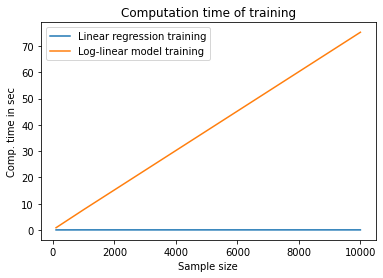

Computation time of linear regression training:[0.010564565658569336, 0.02146744728088379, 0.02113652229309082]
Computation time of log-linear model training:[0.8456647396087646, 7.742002010345459, 75.2649757862091]


In [ ]:
x_axis=[100,1000,10000]

plt.plot(x_axis,comp_lr_fit, label="Linear regression training")
plt.plot(x_axis,comp_llm_fit, label='Log-linear model training')
plt.legend(loc='upper left')
plt.xlabel("Sample size")
plt.ylabel("Comp. time in sec")
plt.title("Computation time of training")
plt.show()
print("Computation time of linear regression training:{}".format(comp_lr_fit))
print("Computation time of log-linear model training:{}".format(comp_llm_fit))


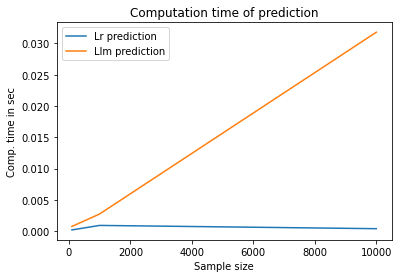

Computation time of linear regression prediction:[0.010564565658569336, 0.02146744728088379, 0.02113652229309082]
Computation time of log-linear model prediction:[0.8456647396087646, 7.742002010345459, 75.2649757862091]


In [ ]:
plt.plot(x_axis,comp_lr_pred, label="Lr prediction")
plt.plot(x_axis,comp_llm_pred, label='Llm prediction')
plt.legend(loc='upper left')
plt.xlabel("Sample size")
plt.ylabel("Comp. time in sec")
plt.title("Computation time of prediction")
plt.show()
print("Computation time of linear regression prediction:{}".format(comp_lr_fit))
print("Computation time of log-linear model prediction:{}".format(comp_llm_fit))

The log-linear model needs linear time for training and prediction and increases with the sample size.
The training and prediction time of linear regression remains constant and is not impacted by the sample size.

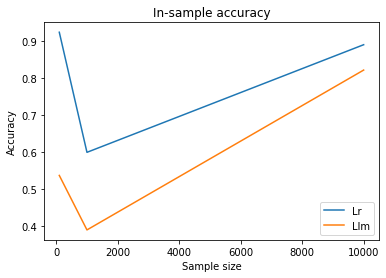

In-sample accuracy of linear regression:[0.925, 0.6, 0.89125]
In-sample accuracy of log-linear model:[0.5375, 0.39, 0.822625]


In [ ]:
plt.plot(x_axis,acc_lr_in_sample, label="Lr")
plt.plot(x_axis,acc_llm_in_sample, label='Llm')
plt.legend(loc='lower right')
plt.xlabel("Sample size")
plt.ylabel("Accuracy")
plt.title("In-sample accuracy")
plt.show()
print("In-sample accuracy of linear regression:{}".format(acc_lr_in_sample))
print("In-sample accuracy of log-linear model:{}".format(acc_llm_in_sample))

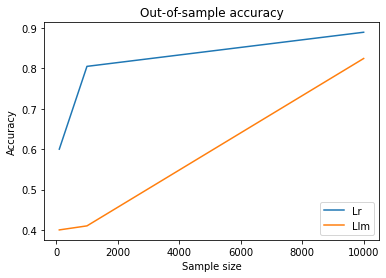

Out-of-sample  accuracy of linear regression:[0.6, 0.805, 0.8895]
Out-of-sample  accuracy of log-linear model:[0.4, 0.41, 0.8245]


In [ ]:
plt.plot(x_axis,acc_lr_out_sample, label="Lr")
plt.plot(x_axis,acc_llm_out_sample, label='Llm')
plt.legend(loc='lower right')
plt.xlabel("Sample size")
plt.ylabel("Accuracy")
plt.title("Out-of-sample accuracy")
plt.show()
print("Out-of-sample  accuracy of linear regression:{}".format(acc_lr_out_sample))
print("Out-of-sample  accuracy of log-linear model:{}".format(acc_llm_out_sample))

Overall the log-linear model is less accurate than the linear regression.

Both models perform the worst when trained with the second dataset, the in-sample accuracy drops when using the second dataset. In the data set many features do not hold any useful information and therefore, both models have poor estimation ability.

The accuracy has increase overall when using the third data set.



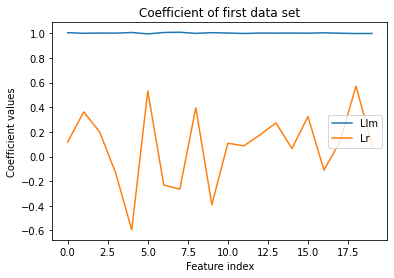

Coefficients of Linear gression:[[ 0.11749391  0.36280229  0.1988937  -0.13524315 -0.59610756  0.53226736
  -0.2309617  -0.26469731  0.39572901 -0.39231489  0.10804355  0.08616512
   0.1752864   0.27279522  0.06448614  0.32427173 -0.1106502   0.1215947
   0.57231295  0.09369065]]
Coefficients of Log-linear model:[1.00569057 1.00071164 1.00273831 1.00183754 1.00720812 0.99568885
 1.00718819 1.00917526 1.00000322 1.00578991 1.00293446 0.99906898
 1.00269881 1.00211643 1.00260041 1.00172848 1.00455932 1.00115118
 0.99879421 0.99936892]


In [ ]:

plt.plot(coef_llm_1, label="Llm")
plt.plot(coef_lr_1[0], label="Lr")
plt.legend(loc='center right')
plt.xlabel("Feature index")
plt.ylabel("Coefficient values")
plt.title("Coefficient of first data set")
plt.show()
print("Coefficients of Linear gression:{}".format(coef_lr_1))
print("Coefficients of Log-linear model:{}".format(coef_llm_1))

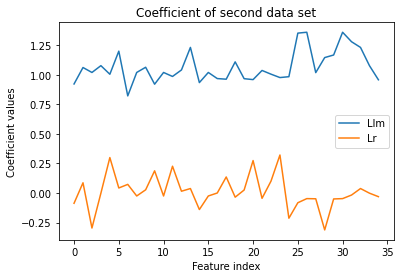

Coefficients of Linear gression:[[-0.08658402  0.08684787 -0.29592981 -0.00103342  0.3000845   0.04283951
   0.0733078  -0.02482786  0.02750635  0.18799465 -0.02482786  0.22691357
   0.01542108  0.03815258 -0.13954696 -0.02482786  0.00046603  0.13593352
  -0.03484043  0.02567557  0.27478879 -0.04467681  0.10062447  0.32179795
  -0.21280161 -0.08202248 -0.04705881 -0.04848713 -0.31186916 -0.04989234
  -0.04705881 -0.01677754  0.03815258 -0.00103342 -0.03058044]]
Coefficients of Log-linear model:[0.92268786 1.06189672 1.0200639  1.07762798 1.00495062 1.20033323
 0.82191028 1.0200724  1.06410767 0.92082173 1.0200724  0.98630607
 1.0413294  1.23193917 0.93445261 1.0200724  0.96840266 0.96314482
 1.10955749 0.96747537 0.95962118 1.03703297 1.00568446 0.97692992
 0.98426739 1.352825   1.36029022 1.01872514 1.14602733 1.16779998
 1.36029022 1.27996796 1.23193917 1.07762798 0.95813172]


In [ ]:
plt.plot(coef_llm_2, label="Llm")
plt.plot(coef_lr_2[0], label="Lr")
plt.legend(loc='center right')
plt.xlabel("Feature index")
plt.ylabel("Coefficient values")
plt.title("Coefficient of second data set")
plt.show()
print("Coefficients of Linear gression:{}".format(coef_lr_2))
print("Coefficients of Log-linear model:{}".format(coef_llm_2))

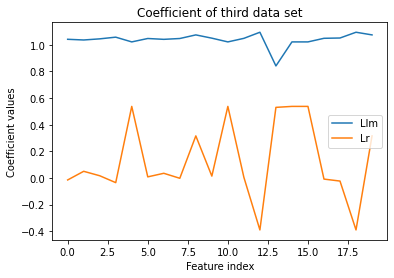

Coefficients of Linear gression:[[-0.0152776   0.04968965  0.01634876 -0.03539352  0.53715296  0.00791353
   0.03477999 -0.00271339  0.31563984  0.01367658  0.53715296  0.00464811
  -0.39050174  0.52985676  0.53715296  0.53715296 -0.00880183 -0.02360706
  -0.39050174  0.31563984]]
Coefficients of Log-linear model:[1.04115821 1.03596903 1.04442845 1.0571752  1.02153693 1.04713392
 1.04077936 1.0470423  1.07414415 1.04962169 1.02153693 1.04825337
 1.09409336 0.84099658 1.02153693 1.02153693 1.04858426 1.05080601
 1.09409336 1.07414415]


In [ ]:
plt.plot(coef_llm_3, label="Llm")
plt.plot(coef_lr_3[0], label="Lr")
plt.legend(loc='center right')
plt.xlabel("Feature index")
plt.ylabel("Coefficient values")
plt.title("Coefficient of third data set")
plt.show()
print("Coefficients of Linear gression:{}".format(coef_lr_3))
print("Coefficients of Log-linear model:{}".format(coef_llm_3))